In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [15]:
Wohnfläche = [1,3,4,5,7,9,12,13,15,16,20,22,23]
Preise = [2,3,5,5,6,9,12,14,15,16,19,21,24]
df = pd.DataFrame({'Wohnfläche': Wohnfläche, 'Preise': Preise})
df

,Wohnfläche,Preise
0,1,2
1,3,3
2,4,5
3,5,5
4,7,6
5,9,9
6,12,12
7,13,14
8,15,15
9,16,16


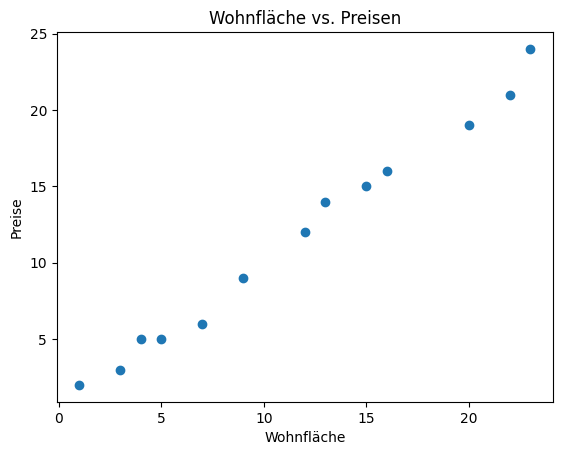

In [16]:


# Achsenbeschriftungen hinzufügen
plt.xlabel('Wohnfläche')
plt.ylabel('Preise')

# Titel hinzufügen
plt.title('Wohnfläche vs. Preisen')

plt.scatter(Wohnfläche,Preise)

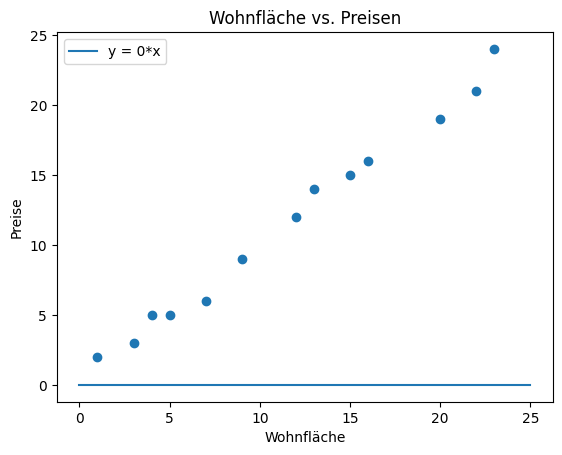

In [18]:

# Achsenbeschriftungen hinzufügen
plt.xlabel('Wohnfläche')
plt.ylabel('Preise')

# Titel hinzufügen
plt.title('Wohnfläche vs. Preisen')
x = np.linspace(0, 25, 400)

plt.scatter(Wohnfläche,Preise)

def func(x,a):
    y = a * x
    return y


plt.plot(x, func(x,0), label='y = 0*x')
plt.legend()

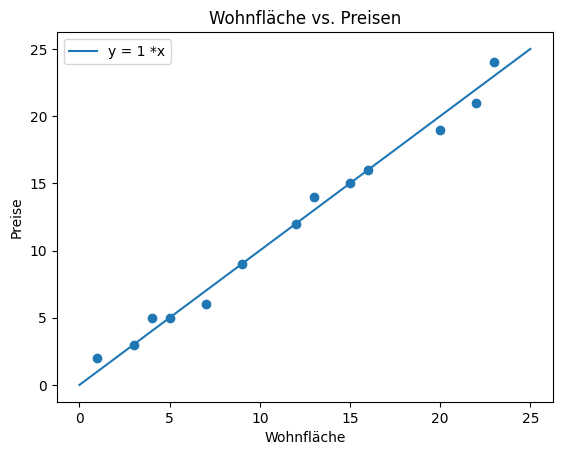

In [12]:


# Achsenbeschriftungen hinzufügen
plt.xlabel('Wohnfläche')
plt.ylabel('Preise')

# Titel hinzufügen
plt.title('Wohnfläche vs. Preisen')
x = np.linspace(0, 25, 400)

plt.scatter(Wohnfläche,Preise)

def func(x,a):
    y = a * x
    return y


plt.plot(x, func(x,1), label='y = 1 *x')
plt.legend()


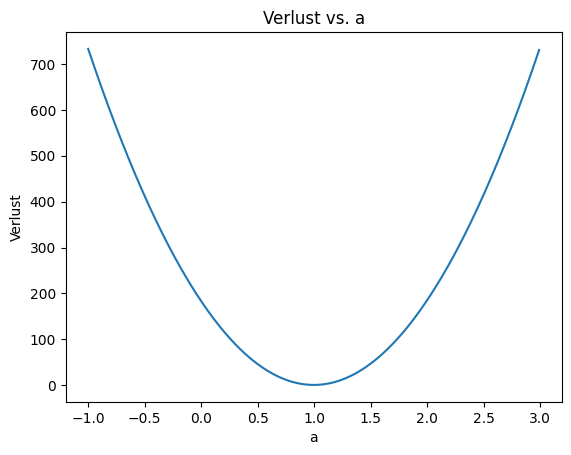

In [13]:
def Quadratischer_verlust(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)   
    return sum((y-y_pred)**2)/ len(y)

def pred(x,a):
    pred = []
    for i in x:
        pred.append(func(i,a))
    return pred

a = [i/100 for i in range(-100,300,1)]
verlust = [Quadratischer_verlust(Preise,pred(Wohnfläche,i)) for i in a]

plt.xlabel('a')
plt.ylabel('Verlust')
plt.title('Verlust vs. a')

plt.plot(a,verlust)

# Filter Edge detection

In [8]:
def apply_kernel(image, kernel):
    image_height, image_width = image.shape
    output = np.zeros((image_height, image_width))
    for i in range(1, image_height - 1):
        for j in range(1, image_width - 1):
            region = image[i-1:i+2, j-1:j+2]
            output[i, j] = np.sum(region * kernel)
    
    return output

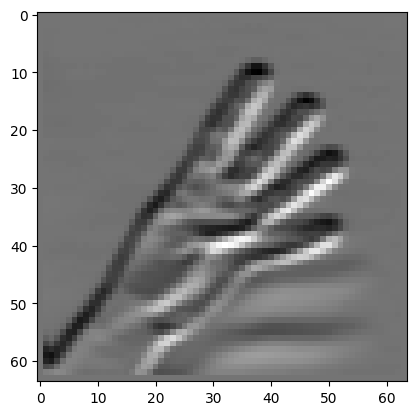

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_rgb = np.array(cv2.imread("C:\Users\Luis\OneDrive\Desktop\Maturaarbeit\codingMA\handsigns\Hand1.jpg"))
img_gray = rgb2gray(img_rgb)


#30
vertical = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

horizontal = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])

output_image = apply_kernel(img_gray, horizontal)

plt.imshow(output_image,  cmap=plt.cm.gray)
